In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt #matplob
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/autompg-dataset/auto-mpg.csv


In [68]:
auto=pd.read_csv("../input/autompg-dataset/auto-mpg.csv")

# # **To analysis the data**

In [69]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [70]:
auto["car name"].value_counts()

ford pinto                     6
ford maverick                  5
amc matador                    5
toyota corolla                 5
amc gremlin                    4
                              ..
toyota carina                  1
dodge colt hatchback custom    1
ford ltd landau                1
chevroelt chevelle malibu      1
dodge colt hardtop             1
Name: car name, Length: 305, dtype: int64

In [71]:
auto.shape

(398, 9)

In [72]:
#columns names
auto = auto.rename(columns={"model year":"model_year","car name":"car_name"})
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

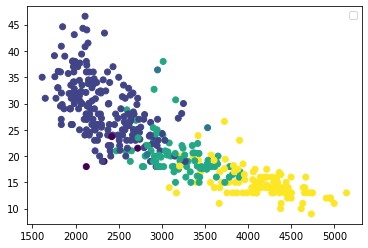

In [73]:
#scatter plot car weight/mpg and c parameters for coloring cylinder types
fig, ax = plt.subplots()
ax.scatter(auto.weight, auto.mpg, c=auto.cylinders)
plt.legend()
plt.show()

In [74]:
auto.isnull().any() #find NA

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
car_name        False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

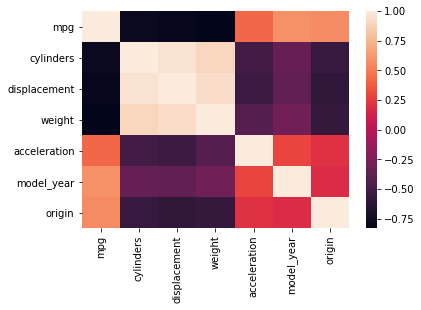

In [75]:
#correlation visualization
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_palette("RdBu")
correlation=auto.corr() # from pandas
sns.heatmap(correlation) # to seborn lib
plt.show

In [76]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [77]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [78]:
#encoding car names 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
car_name_le = pd.DataFrame(le.fit_transform(auto[["car_name"]]),columns=["car_name_encoded"])
car_name_le

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,car_name_encoded
0,49
1,36
2,231
3,14
4,161
...,...
393,153
394,301
395,119
396,159


In [79]:
# One Hot Encoding (most common usage)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown= "ignore")
car_name_ohe = ohe.fit_transform(auto)
car_name_ohe_df = pd.DataFrame(data = car_name_ohe.toarray())
print(car_name_ohe_df)

     0     1     2     3     4     5     6     7     8     9     ...  1067  \
0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  ...   0.0   
2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  ...   0.0   
4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
393   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
394   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
395   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
396   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
397   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

     1068  1069  1070  1071  1072  1073  1074  1075  1076  
0  

In [80]:
#get dummies method. 
car_name_df = pd.concat([auto, pd.get_dummies(auto["car_name"],prefix="model")], axis=1)
car_name_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,model_amc ambassador brougham,...,model_volvo 145e (sw),model_volvo 244dl,model_volvo 245,model_volvo 264gl,model_volvo diesel,model_vw dasher (diesel),model_vw pickup,model_vw rabbit,model_vw rabbit c (diesel),model_vw rabbit custom
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,0,...,0,0,0,0,0,0,0,0,0,0
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,0,...,0,0,0,0,0,0,1,0,0,0
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,0,...,0,0,0,0,0,0,0,0,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
auto=auto.drop(columns=["car_name",axis= 1])
auto

SyntaxError: invalid syntax (<ipython-input-81-78ccc61df5fb>, line 1)

In [ ]:
auto.horsepower=auto.horsepower.replace("?","165")
auto.horsepower=auto.horsepower.astype("int")
auto.shape
auto.origin.astype("category")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(auto)

In [ ]:
auto_scaled = pd.DataFrame(scaler.fit_transform(auto), columns=auto.columns)
print(auto_scaled)

In [ ]:
#data scaling
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
auto_sscaled = pd.DataFrame(sscaler.fit_transform(auto), columns=auto.columns)

In [ ]:
auto_sscaled


In [ ]:
X = auto_scaled.loc[:,auto.columns!="mpg"]
y = auto_scaled.mpg

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import r2_score
lr_predict = lr.predict(X_test)
r2_score(lr_predict, y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(lr_predict, y_test)

In [ ]:
from tpot import TPOTRegressor
tpotr = TPOTRegressor(generations=5, verbosity=3)
tpotr.fit(X_train, y_train)

In [ ]:
tpotr.score(X_test,y_test)

In [ ]:
tpotr.export("regresyon_raporu")

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
predlr = lr.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(predlr, y_test))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

s=sns.relplot(x="weight",y="mpg", data=auto, kind="scatter", hue="cylinders")
plt.show()

In [ ]:
auto.info()

In [ ]:
auto.drop(auto[auto.horsepower=="?"].index, inplace=True)

In [ ]:
auto["horsepower"]=auto["horsepower"].astype("int64")

In [ ]:
auto.cylinders=auto.cylinders.astype("category")

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
auto["cylinders_label"]=le.fit_transform(auto["cylinders"])
auto
auto=auto.drop(columns=["cylinders"])
auto.cylinders_label=auto.cylinders_label.astype("category")

In [ ]:
Y=auto.cylinders_label
auto=auto.drop(columns=["cylinders_label"])

In [ ]:
import pandas as pd    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
auto_scaled = pd.DataFrame(scaler.fit_transform(auto),columns = auto.columns)
auto_scaled

In [ ]:
X=auto_scaled.iloc[:, auto.columns!="cylinders"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
knn.fit(X_train,y_train)
predknn = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predknn,y_test))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(criterion="entropy", max_depth=None)
dec.fit(X_train,y_train)
preddt = dec.predict(X_test)

In [ ]:
print(classification_report(preddt, y_test))